In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [373]:
batting_data = pd.read_csv('ODI data.csv')
batting_data.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Unnamed: 13
0,0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,NaN
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,NaN
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,NaN
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34,NaN
4,4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,NaN


In [374]:
batting_data.dtypes

Unnamed: 0       int64
Player          object
Span            object
Mat              int64
Inns            object
NO              object
Runs            object
HS              object
Ave             object
BF              object
SR              object
100             object
50              object
0               object
Unnamed: 13    float64
dtype: object

In [375]:
batting_data['Inns'] = pd.to_numeric(batting_data['Inns'], errors='coerce')
batting_data['Mat'] = pd.to_numeric(batting_data['Mat'], errors='coerce')
batting_data['NO'] = pd.to_numeric(batting_data['NO'], errors='coerce')
batting_data['Runs'] = pd.to_numeric(batting_data['Runs'], errors='coerce')
batting_data['HS'] = pd.to_numeric(batting_data['HS'], errors='coerce')
batting_data['Ave'] = pd.to_numeric(batting_data['Ave'], errors='coerce')
batting_data['BF'] = pd.to_numeric(batting_data['BF'], errors='coerce')
batting_data['SR'] = pd.to_numeric(batting_data['SR'], errors='coerce')
batting_data['50'] = pd.to_numeric(batting_data['50'], errors='coerce')
batting_data['100'] = pd.to_numeric(batting_data['100'], errors='coerce')
batting_data['0'] = pd.to_numeric(batting_data['0'], errors='coerce')

In [376]:
batting_data = batting_data.replace('-', 0)
batting_data = batting_data.replace('- ', 0)
batting_data = batting_data.replace(' -', 0)
batting_data = batting_data.replace(' - ', 0)

In [377]:
batting_data[['Strt','End']] = batting_data.Span.str.split("-",expand=True) 

In [378]:
batting_data.drop(columns=['Unnamed: 0'], inplace=True)

In [379]:
batting_data.drop(columns=['Span'], inplace=True)

In [380]:
batting_data.drop(columns=['Unnamed: 13'], inplace=True)

In [381]:
batting_data.isnull().sum()

Player      0
Mat         0
Inns       10
NO         10
Runs       10
HS        795
Ave       130
BF         10
SR         19
100        10
50         10
0          10
Strt        0
End         0
dtype: int64

In [382]:
batting_data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),463,452.0,41.0,18426.0,NaN,44.83,21367.0,86.23,49.0,96.0,20.0,1989,2012
1,KC Sangakkara (Asia/ICC/SL),404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,2000,2015
2,RT Ponting (AUS/ICC),375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,1995,2012
3,ST Jayasuriya (Asia/SL),445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,1989,2011
4,DPMD Jayawardene (Asia/SL),448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,ZS Ansari (ENG),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,2015
2496,Ariful Haque (BDESH),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018
2497,Ashfaq Ahmed (PAK),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,1994
2498,MD Bailey (NZ),1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1998


In [383]:
batting_data.dtypes

Player     object
Mat         int64
Inns      float64
NO        float64
Runs      float64
HS        float64
Ave       float64
BF        float64
SR        float64
100       float64
50        float64
0         float64
Strt       object
End        object
dtype: object

In [384]:
batting_data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),463,452.0,41.0,18426.0,NaN,44.83,21367.0,86.23,49.0,96.0,20.0,1989,2012
1,KC Sangakkara (Asia/ICC/SL),404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,2000,2015
2,RT Ponting (AUS/ICC),375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,1995,2012
3,ST Jayasuriya (Asia/SL),445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,1989,2011
4,DPMD Jayawardene (Asia/SL),448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,1998,2015


In [385]:
batting_data = batting_data.dropna()

In [386]:
batting_data.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
Strt      0
End       0
dtype: int64

In [387]:
batting_data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
1,KC Sangakkara (Asia/ICC/SL),404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,2000,2015
2,RT Ponting (AUS/ICC),375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,1995,2012
3,ST Jayasuriya (Asia/SL),445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,1989,2011
4,DPMD Jayawardene (Asia/SL),448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,1998,2015
6,V Kohli (INDIA),242,233.0,39.0,11609.0,183.0,59.84,12445.0,93.28,43.0,55.0,13.0,2008,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,GS Sobers (WI),1,1.0,0.0,0.0,0.0,0.00,6.0,0.00,0.0,0.0,1.0,1973,1973
2485,Tanvir Mehdi (PAK),1,1.0,0.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,1.0,1992,1992
2487,R Walters (NAM),2,2.0,0.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,2.0,2003,2003
2488,CM Willoughby (SA),3,2.0,0.0,0.0,0.0,0.00,4.0,0.00,0.0,0.0,2.0,2000,2003


In [388]:
batting_data.to_excel("dropnapro.xlsx", index = False)

In [389]:
batting_data.Player

1       KC Sangakkara (Asia/ICC/SL)
2              RT Ponting (AUS/ICC)
3           ST Jayasuriya (Asia/SL)
4        DPMD Jayawardene (Asia/SL)
6                   V Kohli (INDIA)
                   ...             
2484                 GS Sobers (WI)
2485             Tanvir Mehdi (PAK)
2487                R Walters (NAM)
2488             CM Willoughby (SA)
2489          Zakir Hossain (BDESH)
Name: Player, Length: 1704, dtype: object

In [390]:
batting_data.Player.str.split(" ")
batting_data['Country'] = batting_data.Player.str.split(" ").str.get(-1)
batting_data['Player Name'] = batting_data.Player.str.split(" ").str.get(1)

C:\Users\choks\AppData\Local\Temp\ipykernel_18340\1250296402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['Country'] = batting_data.Player.str.split(" ").str.get(-1)
C:\Users\choks\AppData\Local\Temp\ipykernel_18340\1250296402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['Player Name'] = batting_data.Player.str.split(" ").str.get(1)


In [391]:
batting_data['Player'] = batting_data['Player Name']
batting_data.drop(columns=['Player Name'], inplace=True)

C:\Users\choks\AppData\Local\Temp\ipykernel_18340\1362789488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['Player'] = batting_data['Player Name']
C:\Users\choks\AppData\Local\Temp\ipykernel_18340\1362789488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data.drop(columns=['Player Name'], inplace=True)


In [392]:
batting_data['Strt'] = pd.to_numeric(batting_data['Strt'], errors='coerce')
batting_data['End'] = pd.to_numeric(batting_data['End'], errors='coerce')

C:\Users\choks\AppData\Local\Temp\ipykernel_18340\742067867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['Strt'] = pd.to_numeric(batting_data['Strt'], errors='coerce')
C:\Users\choks\AppData\Local\Temp\ipykernel_18340\742067867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['End'] = pd.to_numeric(batting_data['End'], errors='coerce')


In [393]:
batting_data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End,Country
1,Sangakkara,404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,2000,2015,(Asia/ICC/SL)
2,Ponting,375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,1995,2012,(AUS/ICC)
3,Jayasuriya,445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,1989,2011,(Asia/SL)
4,Jayawardene,448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,1998,2015,(Asia/SL)
6,Kohli,242,233.0,39.0,11609.0,183.0,59.84,12445.0,93.28,43.0,55.0,13.0,2008,2019,(INDIA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,Sobers,1,1.0,0.0,0.0,0.0,0.00,6.0,0.00,0.0,0.0,1.0,1973,1973,(WI)
2485,Mehdi,1,1.0,0.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,1.0,1992,1992,(PAK)
2487,Walters,2,2.0,0.0,0.0,0.0,0.00,5.0,0.00,0.0,0.0,2.0,2003,2003,(NAM)
2488,Willoughby,3,2.0,0.0,0.0,0.0,0.00,4.0,0.00,0.0,0.0,2.0,2000,2003,(SA)


In [394]:
batting_data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End,Country
1,Sangakkara,404,380.0,41.0,14234.0,169.0,41.98,18048.0,78.86,25.0,93.0,15.0,2000,2015,(Asia/ICC/SL)
2,Ponting,375,365.0,39.0,13704.0,164.0,42.03,17046.0,80.39,30.0,82.0,20.0,1995,2012,(AUS/ICC)
3,Jayasuriya,445,433.0,18.0,13430.0,189.0,32.36,14725.0,91.20,28.0,68.0,34.0,1989,2011,(Asia/SL)
4,Jayawardene,448,418.0,39.0,12650.0,144.0,33.37,16020.0,78.96,19.0,77.0,28.0,1998,2015,(Asia/SL)
6,Kohli,242,233.0,39.0,11609.0,183.0,59.84,12445.0,93.28,43.0,55.0,13.0,2008,2019,(INDIA)


In [395]:
batting_data.describe()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,33.572770,27.036385,4.379695,612.981221,47.718897,17.306232,817.100352,62.315816,0.660798,3.189554,2.292254,2000.197183,2004.106808
std,55.919816,48.548780,8.338949,1518.113083,42.298331,12.082055,1902.968623,26.077227,2.868823,9.205483,3.744047,13.275785,13.137391
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1971.000000,1971.000000
25%,3.000000,3.000000,0.000000,24.000000,14.000000,8.000000,47.000000,47.760000,0.000000,0.000000,0.000000,1992.000000,1996.000000
50%,11.000000,8.000000,1.000000,100.500000,36.000000,15.470000,170.000000,63.090000,0.000000,0.000000,1.000000,2003.000000,2007.000000
75%,38.000000,27.000000,4.250000,426.250000,71.000000,24.425000,612.000000,77.170000,0.000000,2.000000,3.000000,2010.000000,2016.000000
max,448.000000,433.000000,72.000000,14234.000000,264.000000,95.000000,18048.000000,328.570000,43.000000,93.000000,34.000000,2019.000000,2019.000000


C:\Users\choks\AppData\Local\Temp\ipykernel_18340\4143380214.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(batting_data.corr(), annot = True, cmap="coolwarm")


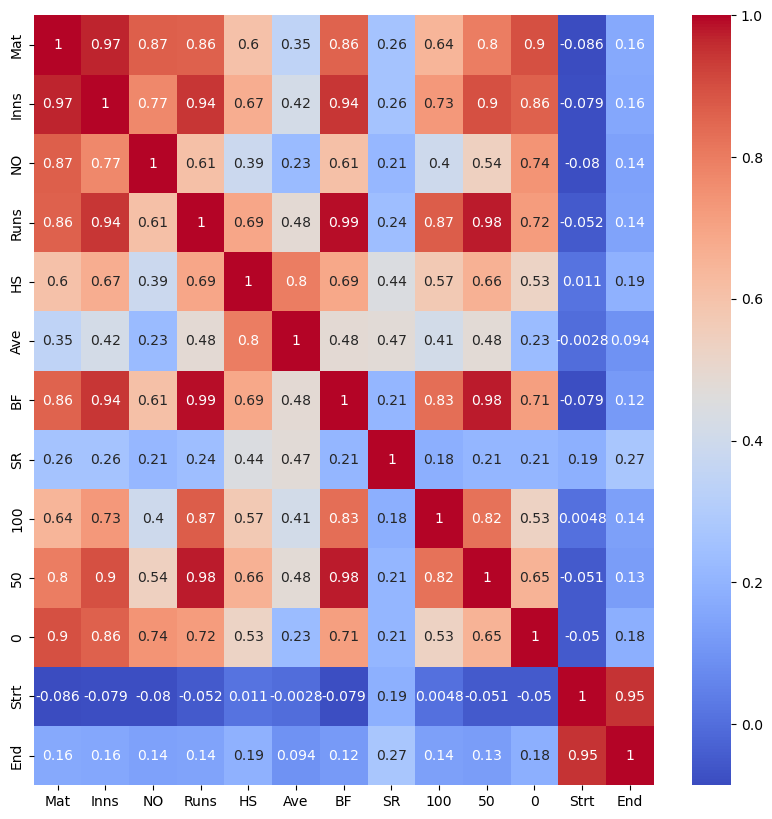

In [396]:
plt.figure(figsize = (10, 10))
sns.heatmap(batting_data.corr(), annot = True, cmap="coolwarm")
plt.savefig('Correlation')
plt.show()

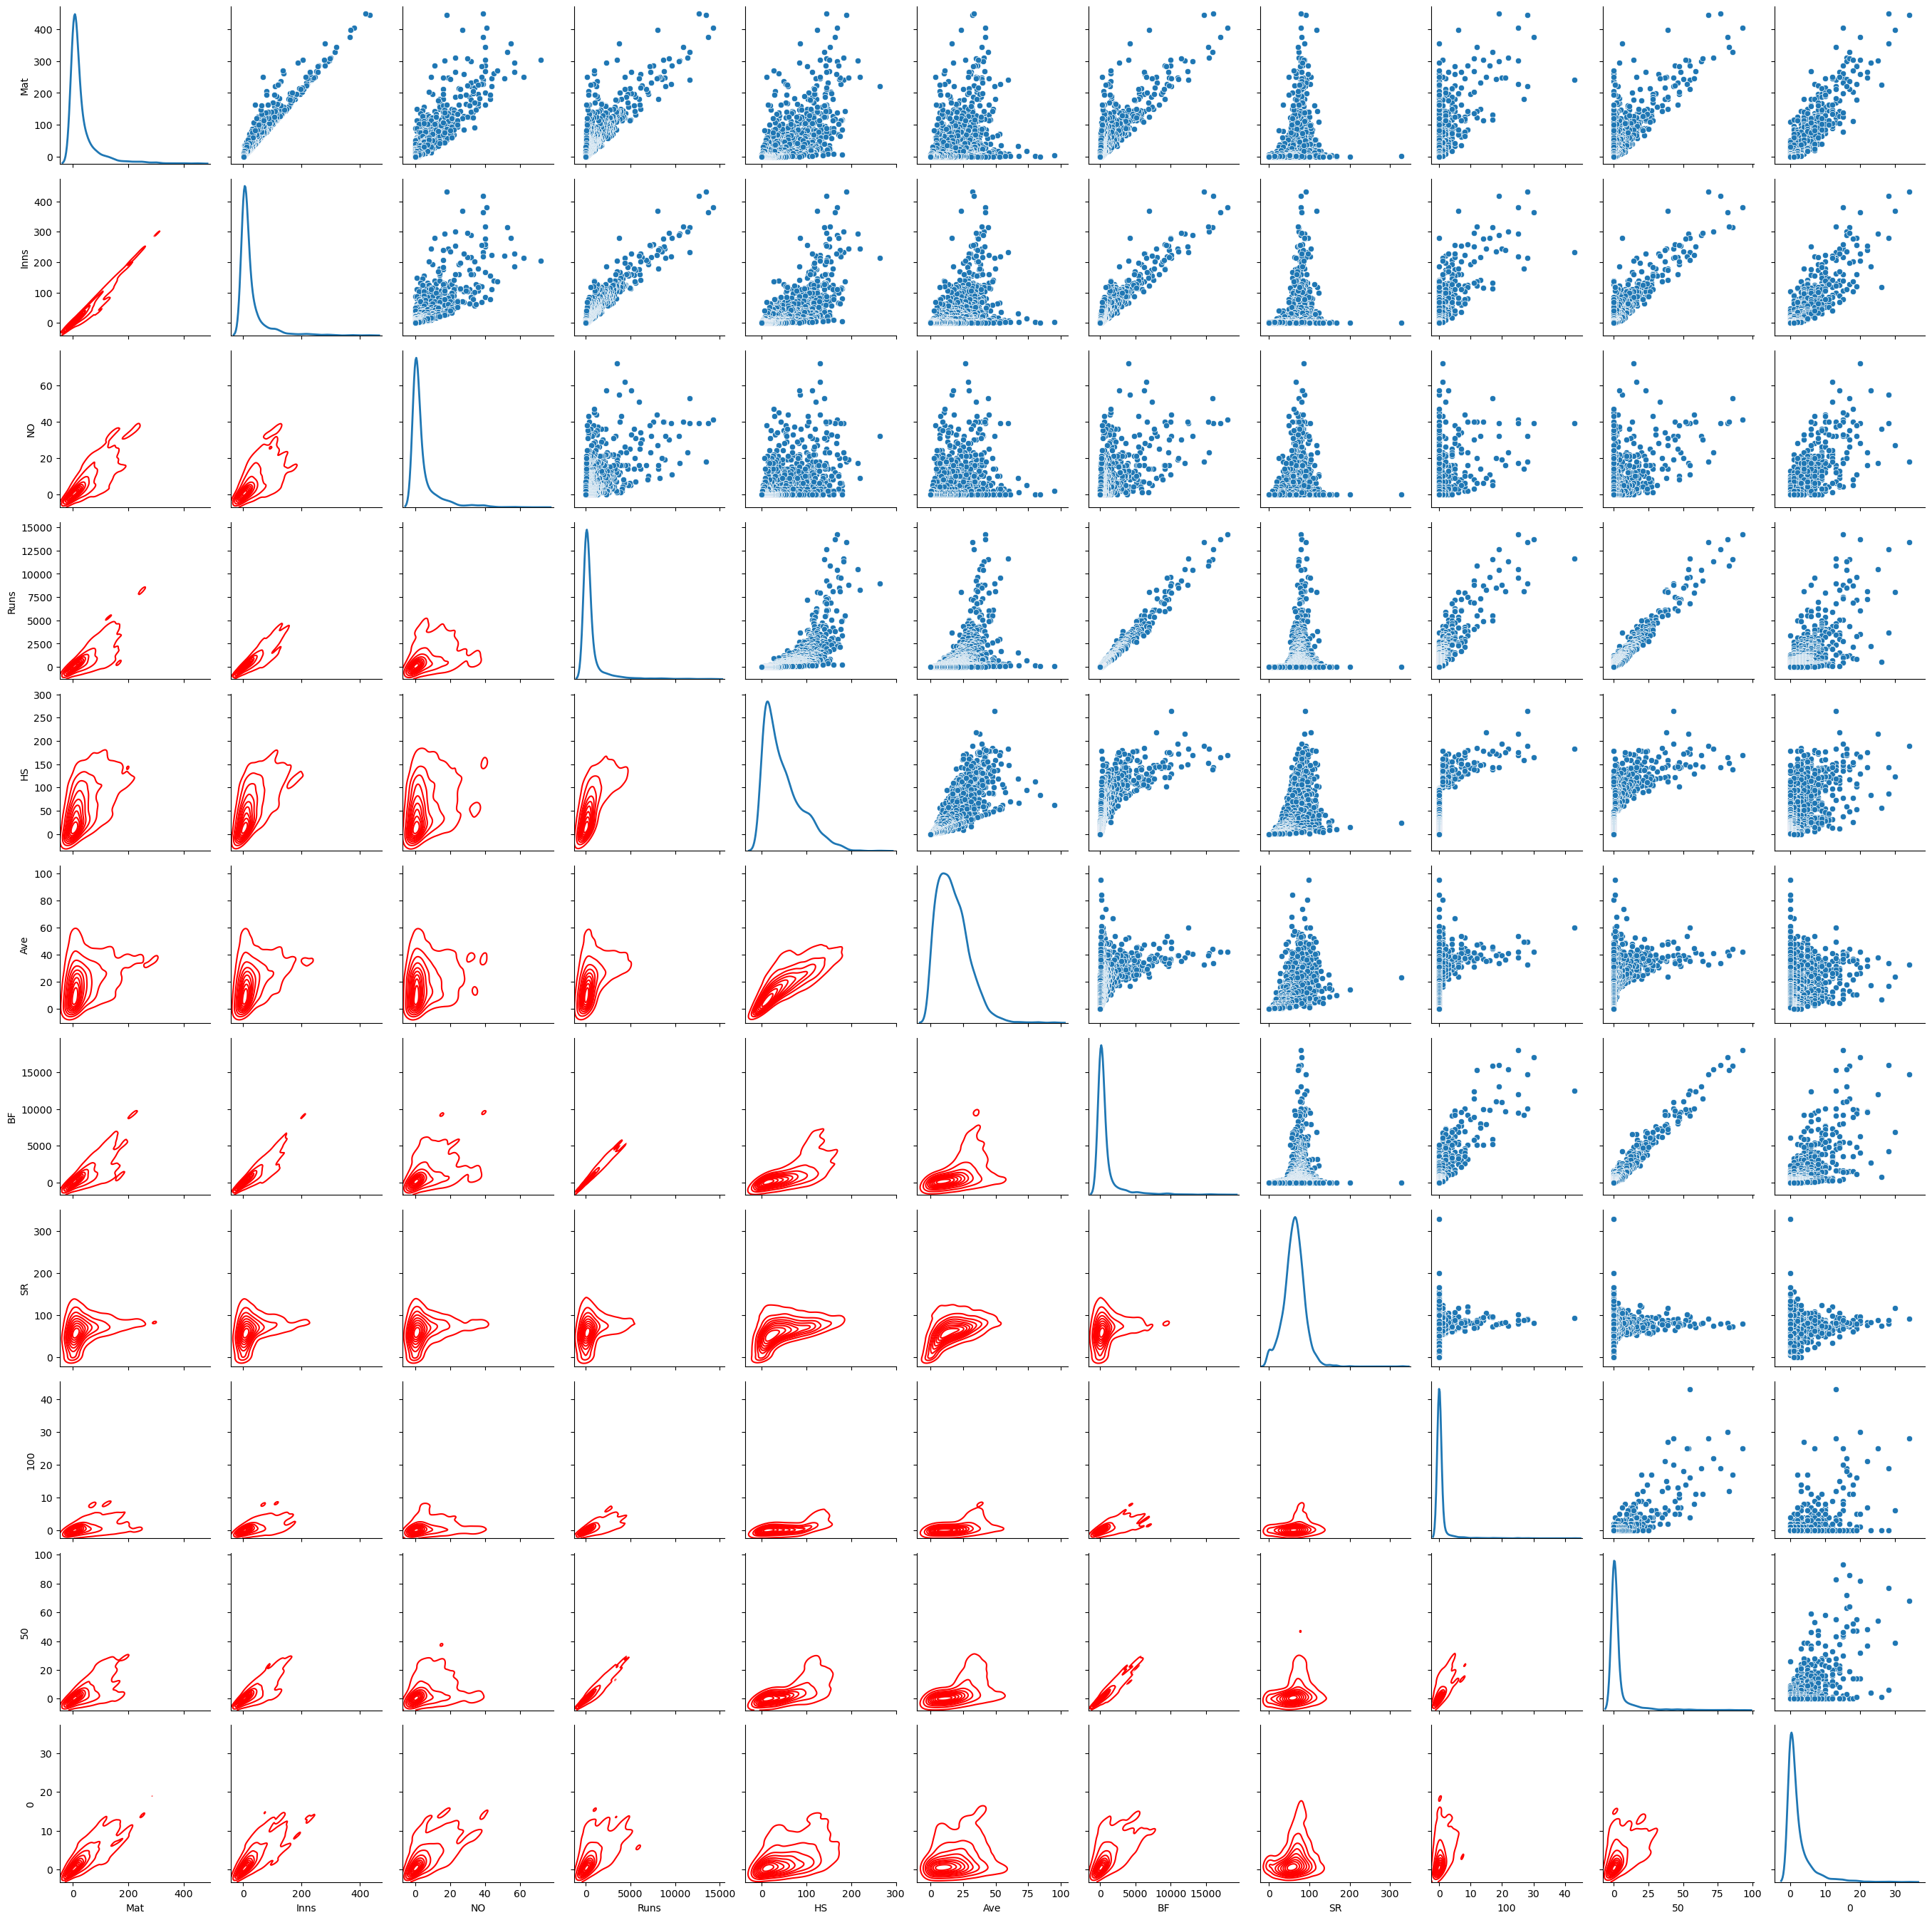

In [411]:
g = sns.PairGrid(batting_data, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors="red")
g.map_diag(sns.kdeplot, lw=2)
plt.show()

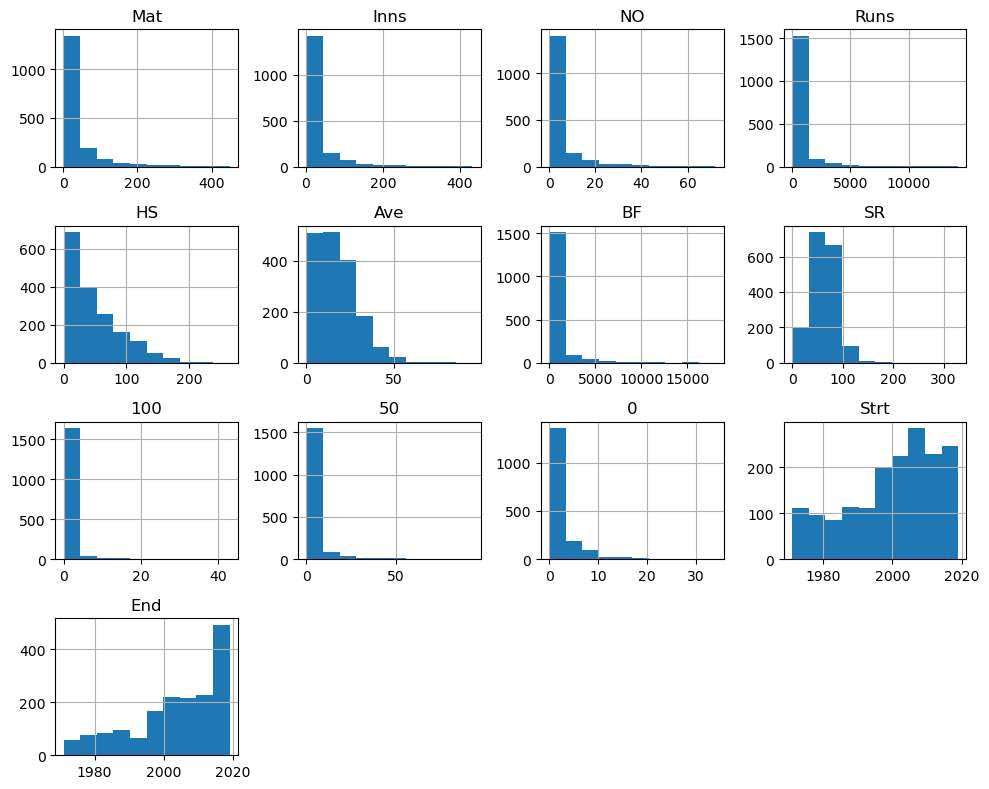

In [398]:
batting_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

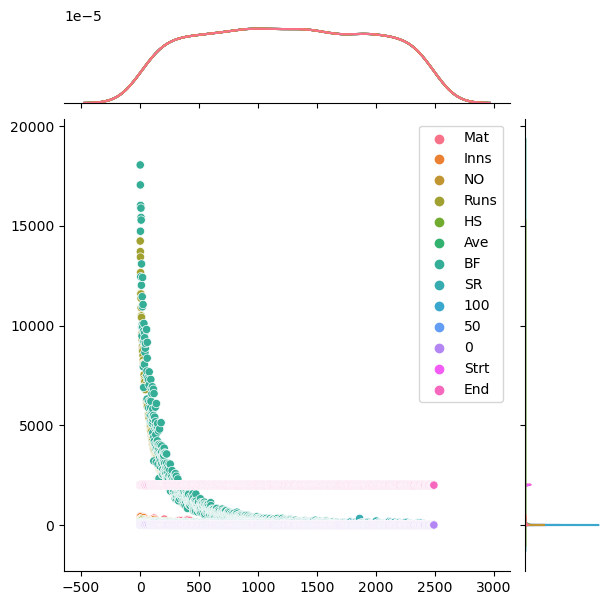

In [399]:
g = sns.JointGrid(data=batting_data, height=6)
g = g.plot(sns.scatterplot, sns.kdeplot)
plt.show()

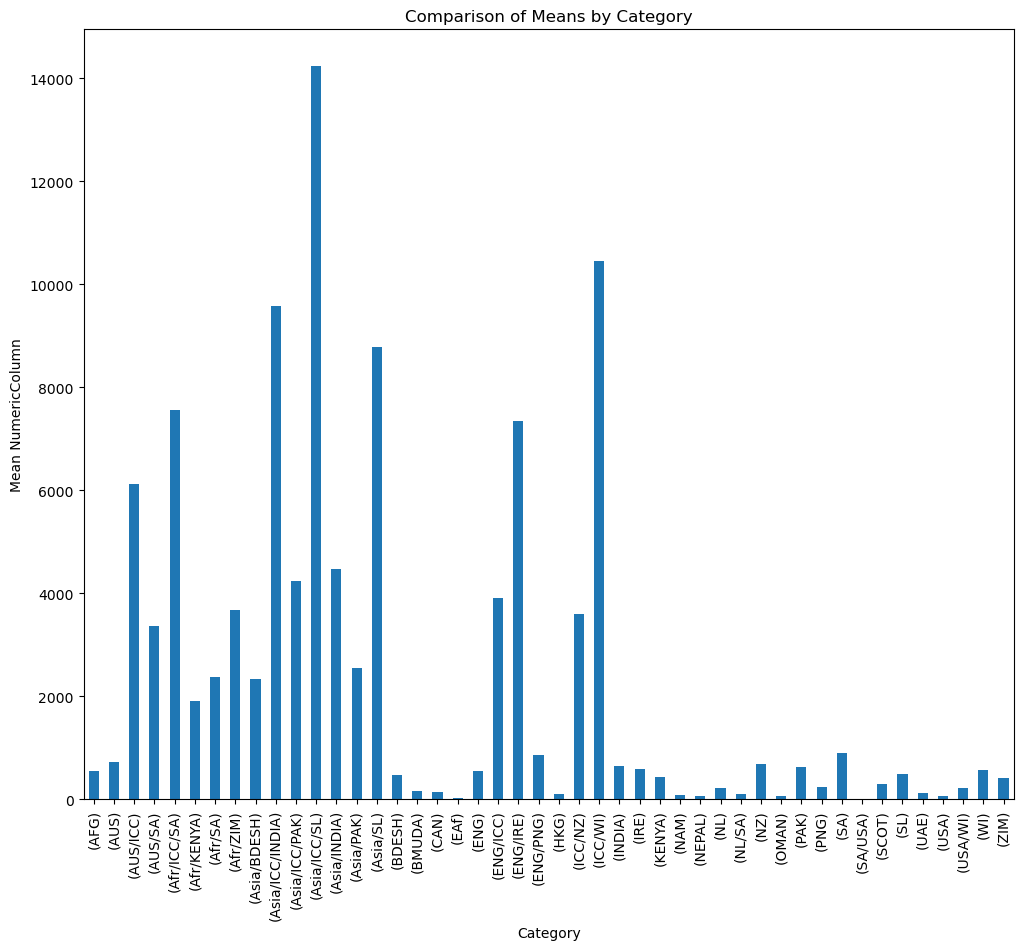

In [400]:
batting_data.groupby('Country')['Runs'].mean().plot(kind='bar', figsize=(12, 10))
plt.xlabel('Category')
plt.ylabel('Mean NumericColumn')
plt.title('Comparison of Means by Category')
plt.show()

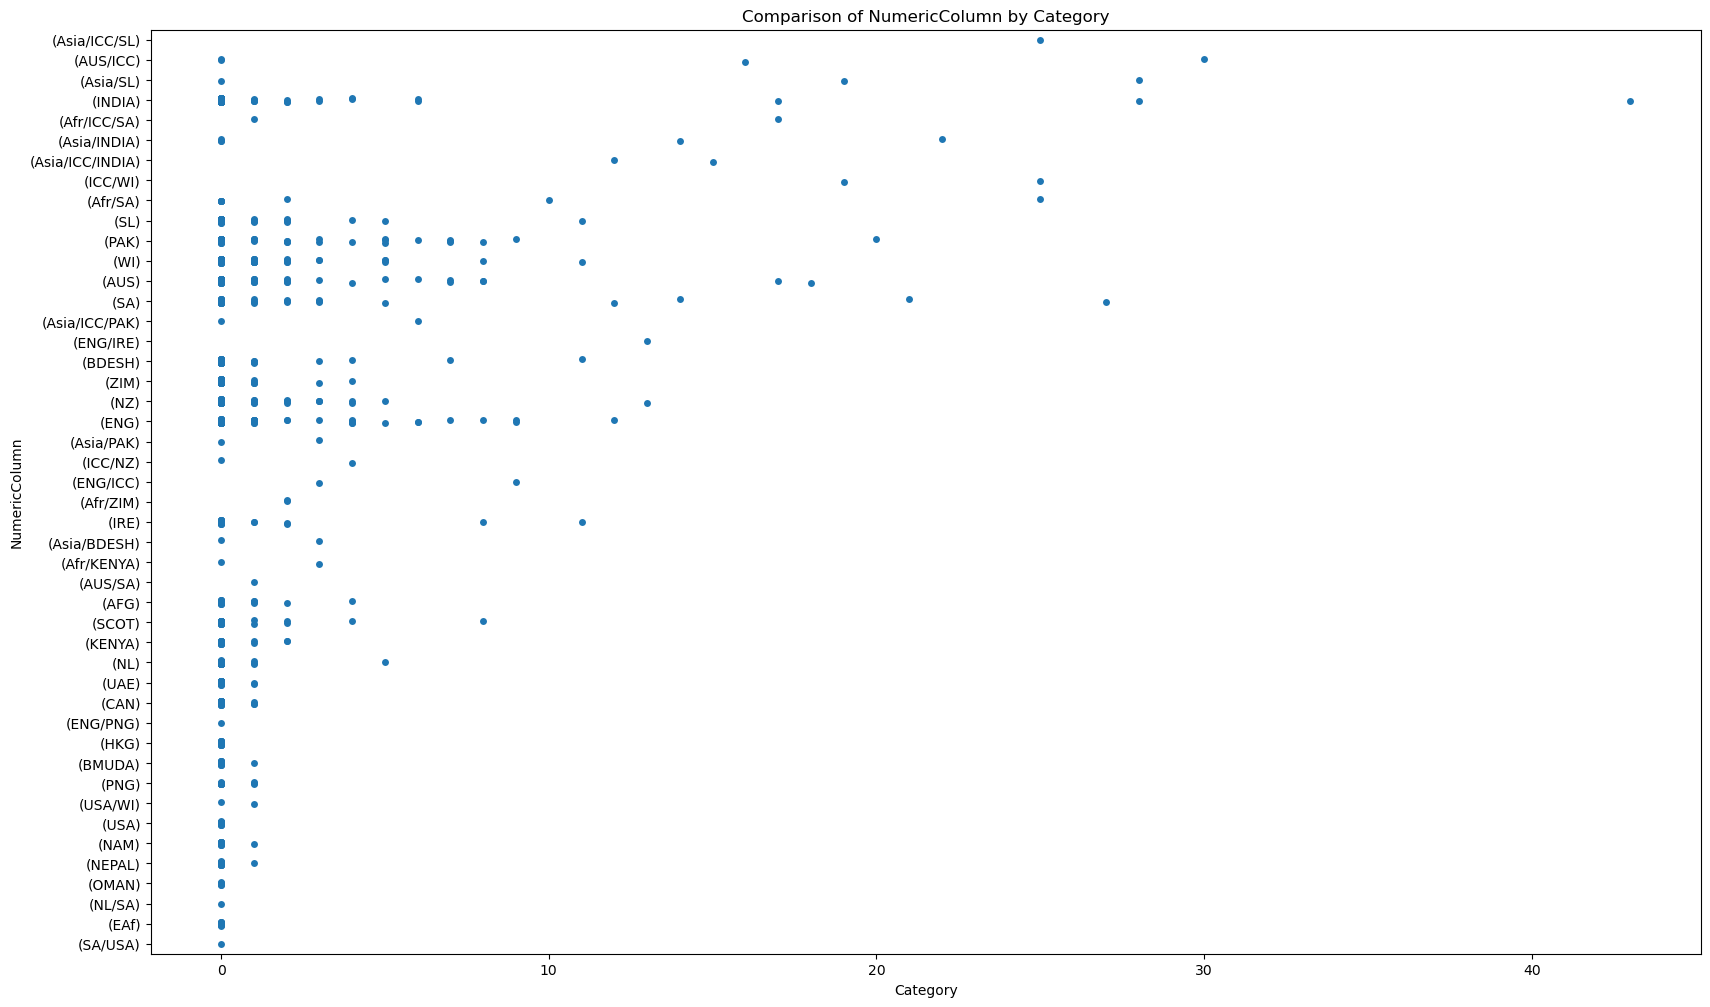

In [401]:
plt.figure(figsize=(20, 12))

sns.stripplot(y='Country', x='100', data=batting_data)
plt.xlabel('Category')
plt.ylabel('NumericColumn')
plt.title('Comparison of NumericColumn by Category')
plt.show()

In [402]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(batting_data['Country'], batting_data['0'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 7077.335369012406
P-value: 0.0
Degrees of freedom: 1215
Expected frequencies:
[[1.07957746e+01 6.45774648e+00 3.12206573e+00 ... 3.28638498e-02
  1.64319249e-02 1.64319249e-02]
 [5.16654930e+01 3.09049296e+01 1.49413146e+01 ... 1.57276995e-01
  7.86384977e-02 7.86384977e-02]
 [1.54225352e+00 9.22535211e-01 4.46009390e-01 ... 4.69483568e-03
  2.34741784e-03 2.34741784e-03]
 ...
 [7.71126761e-01 4.61267606e-01 2.23004695e-01 ... 2.34741784e-03
  1.17370892e-03 1.17370892e-03]
 [4.70387324e+01 2.81373239e+01 1.36032864e+01 ... 1.43192488e-01
  7.15962441e-02 7.15962441e-02]
 [3.50862676e+01 2.09876761e+01 1.01467136e+01 ... 1.06807512e-01
  5.34037559e-02 5.34037559e-02]]


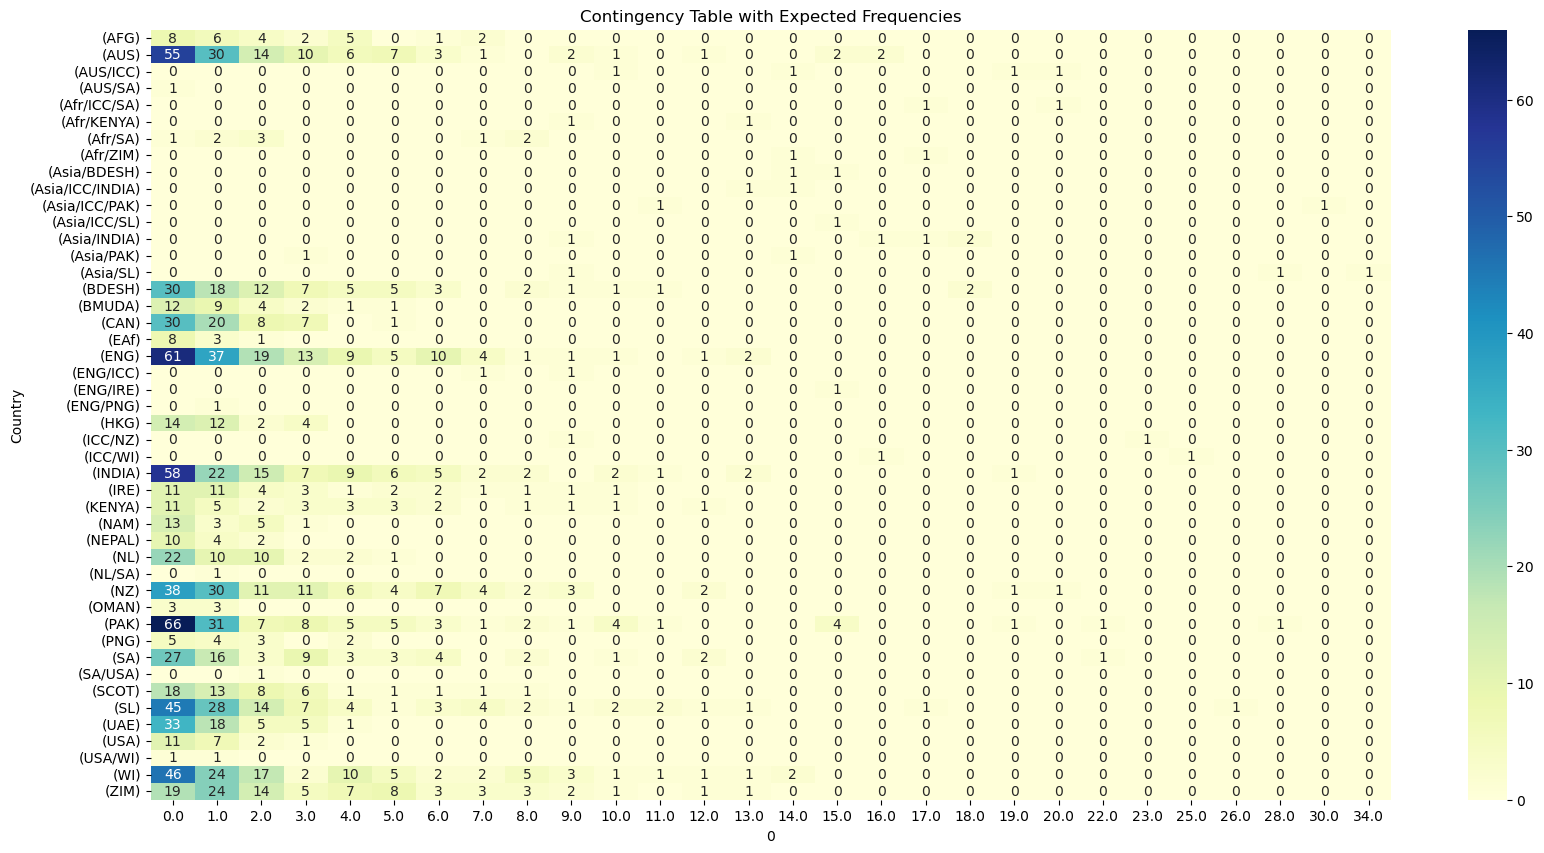

In [403]:
plt.figure(figsize=(20, 10))

sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Contingency Table with Expected Frequencies')
plt.show()

In [404]:
batting_data['Strt'] = pd.to_datetime(batting_data['Strt'], format='%Y')
batting_data['End'] = pd.to_datetime(batting_data['End'], format='%Y')
batting_data.set_index(['Strt', 'End'], inplace=True)

C:\Users\choks\AppData\Local\Temp\ipykernel_18340\3368850610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['Strt'] = pd.to_datetime(batting_data['Strt'], format='%Y')
C:\Users\choks\AppData\Local\Temp\ipykernel_18340\3368850610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_data['End'] = pd.to_datetime(batting_data['End'], format='%Y')


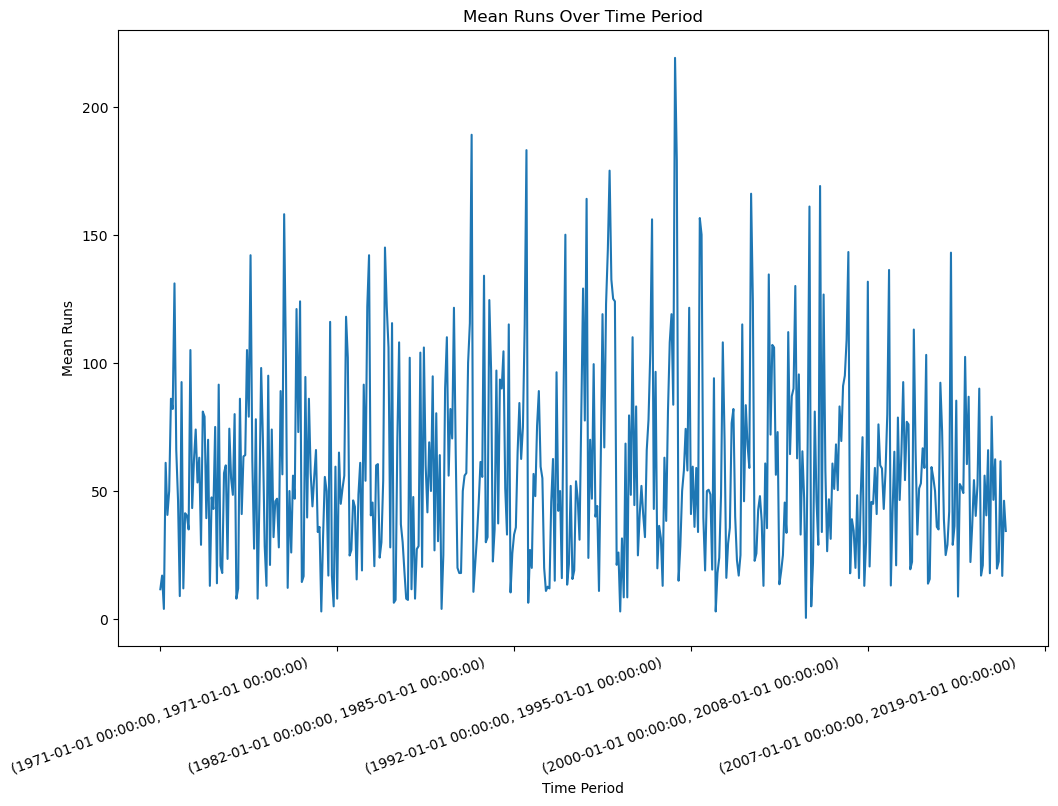

In [405]:
plt.figure(figsize=(20, 10))

runs_mean = batting_data['HS'].groupby(level=[0, 1]).mean()
runs_mean.plot(figsize=(12, 8), title='Mean Runs Over Time Period')
plt.xticks(rotation=20) 
plt.xlabel('Time Period')
plt.ylabel('Mean Runs')
plt.show()

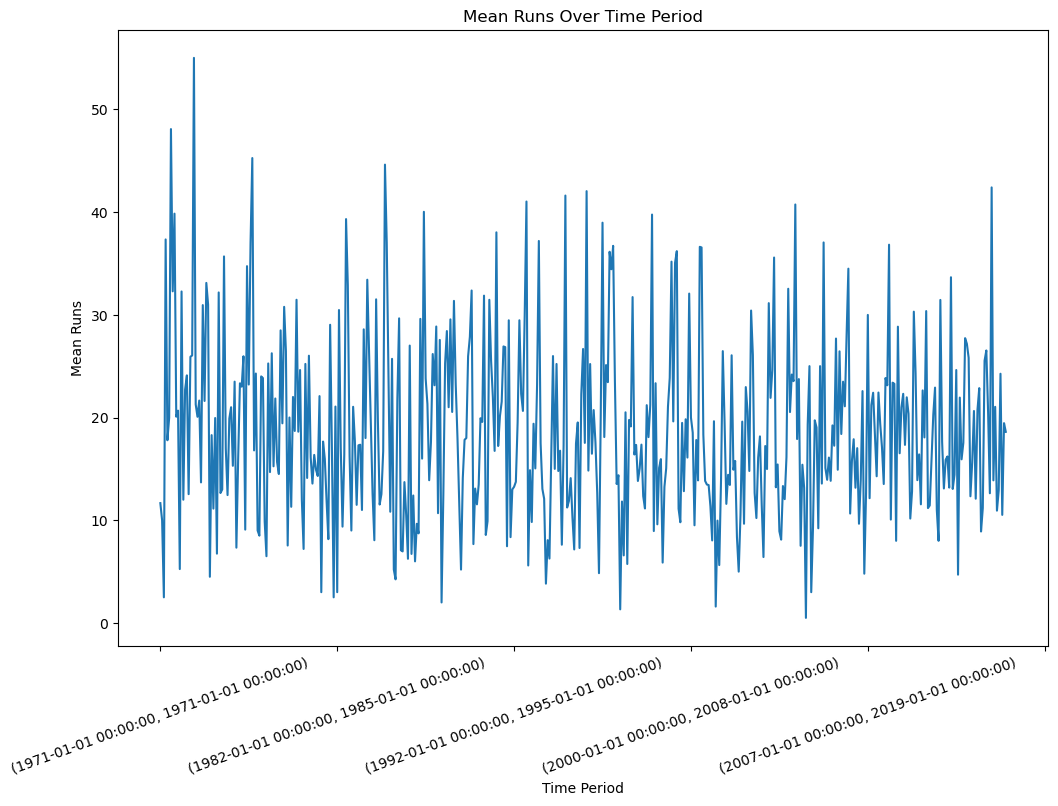

In [406]:
plt.figure(figsize=(20, 10))

a_mean = batting_data['Ave'].groupby(level=[0, 1]).mean()
a_mean.plot(figsize=(12, 8), title='Mean Runs Over Time Period')
plt.xticks(rotation=20) 
plt.xlabel('Time Period')
plt.ylabel('Mean Runs')
plt.show()

In [413]:
grouped_data = [batting_data[batting_data['Country'] == group]['SR'] for group in batting_data['Country'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 2.6123222155644483
P-value: 4.7397555314339173e-08


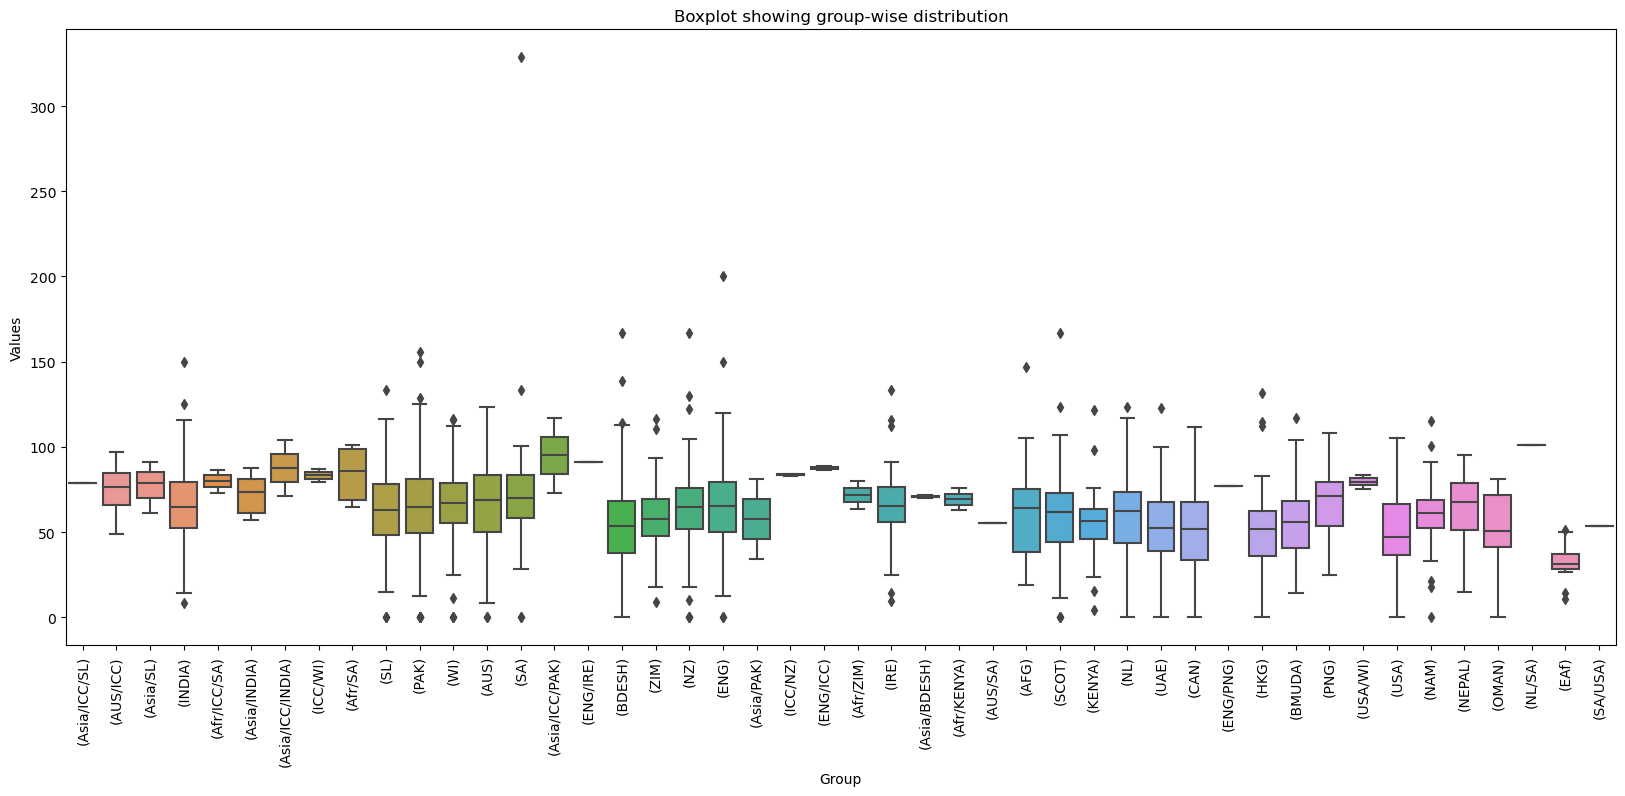

In [417]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Country', y='SR', data=batting_data)
plt.xticks(rotation=90) 
plt.title('Boxplot showing group-wise distribution')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()

In [407]:
 group1 = batting_data[batting_data['Country'] == '(INDIA)']['Runs']
 group2 = batting_data[batting_data['Country'] == '(AUS/ICC)']['Runs']

 groups = [group1, group2]

 t_stat, p_value = stats.ttest_ind(group1, group2)
 print(f"T-statistic: {t_stat}\nP-value: {p_value}")


T-statistic: -5.8876963037576955
P-value: 2.984816221086509e-08


In [408]:
correlation1 = batting_data['Ave'].corr(batting_data['SR'])
print(f"Correlation between column1 and column2: {correlation1}")

Correlation between column1 and column2: 0.4738568874296216


In [409]:
correlation2 = batting_data['Ave'].corr(batting_data['BF'])
print(f"Correlation between column1 and column2: {correlation2}")

Correlation between column1 and column2: 0.48407155789856293
